<a href="https://colab.research.google.com/github/labigboss/Colab/blob/main/Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**import** 
ເອີ້ນນຳໃຊ້ pandas ເປັນ Python Package ເຊິ່ງແມ່ນເຄື່ອງມືສຳລັບວິເຄາະ ແລະ ຈັດການຂໍ້ມຸນ ໂດຍແທນຊື່ຕົວປ່ຽນເປັນ pd

In [ ]:
import pandas as pd

import mlxtend
from mlxtend.frequent_patterns import association_rules, apriori, fpgrowth

%config InlineBackend.figure_format='retina'


**version**

In [ ]:
print(f'pandas    version: {pd.__version__}')
print(f'mlxtend   version: {mlxtend.__version__}')

pandas    version: 1.3.5
mlxtend   version: 0.21.0


**timezone**

In [ ]:
pd.Timestamp.now()

Timestamp('2023-01-18 15:30:47.892500')

# 1 read and transform basket data

ສ້າງຕົວແປ url 
load ຂໍ້ມູນຈາກເວັບໄຊເຂົ້າມາ Data frame

In [ ]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/basket_items.csv'
data=pd.read_csv(url)
data[:5]

,trans,items
0,1,butter|bread|coke
1,2,bread|butter
2,3,beer|diaper|milk
3,4,beer|bread|butter|diaper|milk
4,5,coke|diaper|milk|bread


Dummy variable ແມ່ນຕົວປ່ຽນທີ່ຂໍ້ມູນບໍ່ແມ່ນປະເພດຕົວເລກ

In [ ]:
basket=data['items'].str.get_dummies('|')
basket[:5]

,beer,bread,butter,coke,diaper,milk
0,0,1,1,1,0,0
1,0,1,1,0,0,0
2,1,0,0,0,1,1
3,1,1,1,0,1,1
4,0,1,0,1,1,1


ສະແດງຂໍ້ມູນກ່ຽວກັບ DataFrame ເຊັ່ນ index dtype, column dtypes, ຄ່າ non-null ແລະ ຂະໜາດໜ່ວຍຄວາມຈຳທີ່ໃຊ້



In [ ]:
basket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   beer    5 non-null      int64
 1   bread   5 non-null      int64
 2   butter  5 non-null      int64
 3   coke    5 non-null      int64
 4   diaper  5 non-null      int64
 5   milk    5 non-null      int64
dtypes: int64(6)
memory usage: 368.0 bytes


**ປ່ຽນຮູບແບບ**

In [ ]:
basket=basket.astype(pd.SparseDtype("bool"))
basket[:10]


,beer,bread,butter,coke,diaper,milk
0,False,True,True,True,False,False
1,False,True,True,False,False,False
2,True,False,False,False,True,True
3,True,True,True,False,True,True
4,False,True,False,True,True,True


In [ ]:
basket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   beer    5 non-null      Sparse[bool, False]
 1   bread   5 non-null      Sparse[bool, False]
 2   butter  5 non-null      Sparse[bool, False]
 3   coke    5 non-null      Sparse[bool, False]
 4   diaper  5 non-null      Sparse[bool, False]
 5   milk    5 non-null      Sparse[bool, False]
dtypes: Sparse[bool, False](6)
memory usage: 213.0 bytes


In [ ]:
basket

,beer,bread,butter,coke,diaper,milk
0,False,True,True,True,False,False
1,False,True,True,False,False,False
2,True,False,False,False,True,True
3,True,True,True,False,True,True
4,False,True,False,True,True,True


# 2. ການຈັດຊຸດຂໍ້ມູມ ທີ່ຊື້ເປັນປະຈໍາ

In [ ]:
# frequent_itemsets = apriori(basket, min_support = 0.05, use_colnames = True)

In [ ]:
frequent_itemsets = fpgrowth(basket, min_support = 0.05, use_colnames = True)

# frequent_itemsets['support_n']=frequent_itemsets['support']*len(basket)
frequent_itemsets.sort_values('support', ascending=False)


,support,itemsets
0,0.8,(bread)
3,0.6,(milk)
4,0.6,(diaper)
23,0.6,"(diaper, milk)"
6,0.6,"(bread, butter)"
1,0.6,(butter)
26,0.4,"(beer, diaper)"
24,0.4,"(bread, diaper)"
22,0.4,"(bread, milk)"
27,0.4,"(beer, milk)"


# 3.​ສ້າງ association rule
ການຈັດເຊັດສິນຄ້າ

In [ ]:
# metrices = ['support', 'confidence', 'lift', 'leverage', and 'conviction']

metric='lift'
# rules = association_rules(frequent_itemsets, metric = "support", min_threshold = .2)
# rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = .5)
rules = association_rules(frequent_itemsets, metric = metric, min_threshold = 1)

rules.sort_values('support', ascending = False, inplace = True)
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bread),(butter),0.8,0.6,0.6,0.750000,1.250000,0.12,1.6
48,(diaper),(milk),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
49,(milk),(diaper),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
1,(butter),(bread),0.6,0.8,0.6,1.000000,1.250000,0.12,inf
58,"(beer, diaper)",(milk),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
...,...,...,...,...,...,...,...,...,...
43,"(milk, coke)","(bread, diaper)",0.2,0.4,0.2,1.000000,2.500000,0.12,inf
42,"(diaper, coke)","(bread, milk)",0.2,0.4,0.2,1.000000,2.500000,0.12,inf
41,"(bread, milk)","(diaper, coke)",0.4,0.2,0.2,0.500000,2.500000,0.12,1.6
40,"(bread, diaper)","(milk, coke)",0.4,0.2,0.2,0.500000,2.500000,0.12,1.6


In [ ]:
basket

,beer,bread,butter,coke,diaper,milk
0,False,True,True,True,False,False
1,False,True,True,False,False,False
2,True,False,False,False,True,True
3,True,True,True,False,True,True
4,False,True,False,True,True,True


In [ ]:
a='diaper'
b='beer'
rules[(rules['antecedents']=={a}) & (rules['consequents']=={b})]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
55,(diaper),(beer),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [ ]:
rules[(rules['antecedents']=={b}) & (rules['consequents']=={a})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
54,(beer),(diaper),0.4,0.6,0.4,1.0,1.666667,0.16,inf


In [ ]:
a='diaper'
b='beer'
rules[((rules['antecedents']=={a}) & (rules['consequents']=={b})) | 
      ((rules['antecedents']=={b}) & (rules['consequents']=={a}))]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
55,(diaper),(beer),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
54,(beer),(diaper),0.4,0.6,0.4,1.000000,1.666667,0.16,inf


In [ ]:
basket

,beer,bread,butter,coke,diaper,milk
0,False,True,True,True,False,False
1,False,True,True,False,False,False
2,True,False,False,False,True,True
3,True,True,True,False,True,True
4,False,True,False,True,True,True


##  4.ວິທີ່ຄໍານວນຄ່າ support, confidence,litt

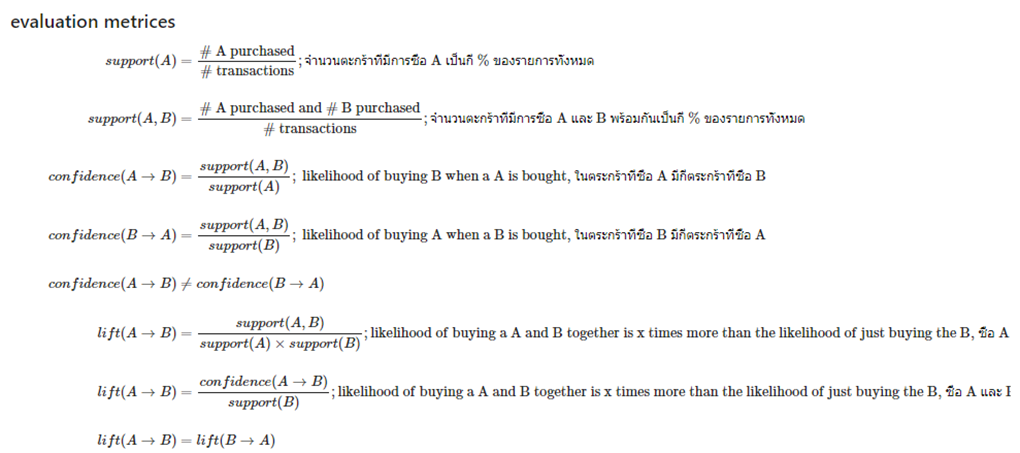

**ຈໍານວນ**

In [ ]:
len(basket)

5

**support**

In [ ]:
basket.sum()

beer      2
bread     4
butter    3
coke      2
diaper    3
milk      3
dtype: int64

In [ ]:
basket['bread'].sum()

4

In [ ]:
basket['bread'].sum()/len(basket)

0.8

In [ ]:
support=basket.sum()/len(basket)
support.sort_values(ascending=False)


bread     0.8
butter    0.6
diaper    0.6
milk      0.6
beer      0.4
coke      0.4
dtype: float64

In [ ]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bread),(butter),0.8,0.6,0.6,0.750000,1.250000,0.12,1.6
48,(diaper),(milk),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
49,(milk),(diaper),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
1,(butter),(bread),0.6,0.8,0.6,1.000000,1.250000,0.12,inf
58,"(beer, diaper)",(milk),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
...,...,...,...,...,...,...,...,...,...
43,"(milk, coke)","(bread, diaper)",0.2,0.4,0.2,1.000000,2.500000,0.12,inf
42,"(diaper, coke)","(bread, milk)",0.2,0.4,0.2,1.000000,2.500000,0.12,inf
41,"(bread, milk)","(diaper, coke)",0.4,0.2,0.2,0.500000,2.500000,0.12,1.6
40,"(bread, diaper)","(milk, coke)",0.4,0.2,0.2,0.500000,2.500000,0.12,1.6


In [ ]:
# basket.loc[1, 'bread']=0
# support=basket.sum()/len(basket)
# support.sort_values(ascending=False)


**confidence**

In [ ]:
item_a='bread'
item_b='butter'
support_a=basket[item_a].sum()/len(basket)
support_b=basket[item_b].sum()/len(basket)
print(support_a, support_b)


0.8 0.6


In [ ]:
a_and_b=len(basket[(basket[item_a]==1) & (basket[item_b]==1)])
a_and_b


3

In [ ]:
support_a_and_b=a_and_b/len(basket)
support_a_and_b


0.6

In [ ]:
conf_a_b=support_a_and_b/support_a
conf_a_b


0.7499999999999999

In [ ]:
conf_b_a=support_a_and_b/support_b
conf_b_a


1.0

**lift**

In [ ]:
# lift=conf_a_b/support_b
lift=support_a_and_b / (support_a * support_b)
lift


1.25

# 5. filter item sets (SET column)

In [ ]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/basket_items.csv'
data=pd.read_csv(url)
data[:5]


,trans,items
0,1,butter|bread|coke
1,2,bread|butter
2,3,beer|diaper|milk
3,4,beer|bread|butter|diaper|milk
4,5,coke|diaper|milk|bread


**ປ່ຽນຮູບແບບ**

In [ ]:
basket=data['items'].str.get_dummies('|').astype(pd.SparseDtype("bool"))
basket[:5]


,beer,bread,butter,coke,diaper,milk
0,False,True,True,True,False,False
1,False,True,True,False,False,False
2,True,False,False,False,True,True
3,True,True,True,False,True,True
4,False,True,False,True,True,True


In [ ]:
frequent_itemsets = apriori(basket, min_support = 0.05, use_colnames = True)
# frequent_itemsets = fpgrowth(basket, min_support = 0.05, use_colnames = True)

# frequent_itemsets['support_n']=frequent_itemsets['support']*len(basket)
frequent_itemsets.sort_values('support', ascending=False)


,support,itemsets
1,0.8,(bread)
2,0.6,(butter)
4,0.6,(diaper)
5,0.6,(milk)
19,0.6,"(diaper, milk)"
10,0.6,"(bread, butter)"
0,0.4,(beer)
11,0.4,"(bread, coke)"
25,0.4,"(beer, diaper, milk)"
31,0.4,"(bread, diaper, milk)"


In [ ]:
# metrices = ['support', 'confidence', 'lift', 'leverage', and 'conviction']

metric='lift'
# rules = association_rules(frequent_itemsets, metric = "support", min_threshold = .2)
# rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = .5)
rules = association_rules(frequent_itemsets, metric = metric, min_threshold = 1)

rules.sort_values('support', ascending = False, inplace = True)
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(bread),(butter),0.8,0.6,0.6,0.750000,1.250000,0.12,1.6
5,(butter),(bread),0.6,0.8,0.6,1.000000,1.250000,0.12,inf
8,(diaper),(milk),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(milk),(diaper),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
0,(beer),(diaper),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
...,...,...,...,...,...,...,...,...,...
59,"(milk, coke)",(diaper),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
58,"(diaper, coke)",(milk),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
57,(milk),"(diaper, butter)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
56,(diaper),"(milk, butter)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2


**ຕົວເລກ**

In [ ]:
rules.loc[0, 'antecedents']

frozenset({'beer'})

**ຊອກຫາຄ່າຕົວດຽວ**

In [ ]:
rules[rules['antecedents'].apply(lambda s: len(s))==1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(bread),(butter),0.8,0.6,0.6,0.750000,1.250000,0.12,1.6
5,(butter),(bread),0.6,0.8,0.6,1.000000,1.250000,0.12,inf
8,(diaper),(milk),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(milk),(diaper),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
0,(beer),(diaper),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
...,...,...,...,...,...,...,...,...,...
61,(milk),"(diaper, coke)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
60,(diaper),"(milk, coke)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
57,(milk),"(diaper, butter)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
56,(diaper),"(milk, butter)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2


ຊອກຫາຄ່າມີ **3ຕົວ**

In [ ]:
rules[rules['antecedents'].apply(lambda s: len(s))==3]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
112,"(diaper, milk, butter)",(bread),0.2,0.8,0.2,1.0,1.250000,0.04,inf
120,"(bread, diaper, coke)",(milk),0.2,0.6,0.2,1.0,1.666667,0.08,inf
121,"(bread, diaper, milk)",(coke),0.4,0.4,0.2,0.5,1.250000,0.04,1.2
122,"(bread, milk, coke)",(diaper),0.2,0.6,0.2,1.0,1.666667,0.08,inf
123,"(diaper, milk, coke)",(bread),0.2,0.8,0.2,1.0,1.250000,0.04,inf
111,"(bread, milk, butter)",(diaper),0.2,0.6,0.2,1.0,1.666667,0.08,inf
98,"(beer, diaper, butter)",(milk),0.2,0.6,0.2,1.0,1.666667,0.08,inf
99,"(beer, milk, butter)",(diaper),0.2,0.6,0.2,1.0,1.666667,0.08,inf
100,"(diaper, milk, butter)",(beer),0.2,0.4,0.2,1.0,2.500000,0.12,inf
110,"(bread, diaper, butter)",(milk),0.2,0.6,0.2,1.0,1.666667,0.08,inf


ຊອກຫາຄ່າຕົວດຽວ ທີ່ມີ **liftຫຼາຍກ່ອນ2**

In [ ]:
rules[(rules['antecedents'].apply(lambda s: len(s))==1) & (rules['lift'] > 2)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
107,(beer),"(diaper, milk, butter)",0.4,0.2,0.2,0.5,2.5,0.12,1.6
156,(beer),"(diaper, milk, bread, butter)",0.4,0.2,0.2,0.5,2.5,0.12,1.6
28,(beer),"(milk, butter)",0.4,0.2,0.2,0.5,2.5,0.12,1.6
24,(beer),"(diaper, butter)",0.4,0.2,0.2,0.5,2.5,0.12,1.6
82,(beer),"(bread, milk, butter)",0.4,0.2,0.2,0.5,2.5,0.12,1.6
70,(beer),"(bread, diaper, butter)",0.4,0.2,0.2,0.5,2.5,0.12,1.6


In [ ]:
rules[rules['antecedents']=={'diaper'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(diaper),(milk),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
1,(diaper),(beer),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
34,(diaper),"(beer, milk)",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
52,(diaper),"(bread, milk)",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
118,(diaper),"(bread, milk, butter)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
96,(diaper),"(beer, bread, milk)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
108,(diaper),"(beer, milk, butter)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
155,(diaper),"(beer, bread, milk, butter)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
129,(diaper),"(bread, milk, coke)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
25,(diaper),"(beer, butter)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2


In [ ]:
rules[rules['antecedents']!={'diaper'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(bread),(butter),0.8,0.6,0.6,0.750000,1.250000,0.12,1.6
5,(butter),(bread),0.6,0.8,0.6,1.000000,1.250000,0.12,inf
9,(milk),(diaper),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
0,(beer),(diaper),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
51,"(bread, milk)",(diaper),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
...,...,...,...,...,...,...,...,...,...
61,(milk),"(diaper, coke)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
59,"(milk, coke)",(diaper),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
58,"(diaper, coke)",(milk),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
57,(milk),"(diaper, butter)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2


In [ ]:
rules[~(rules['antecedents']=={'diaper'})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(bread),(butter),0.8,0.6,0.6,0.750000,1.250000,0.12,1.6
5,(butter),(bread),0.6,0.8,0.6,1.000000,1.250000,0.12,inf
9,(milk),(diaper),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
0,(beer),(diaper),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
51,"(bread, milk)",(diaper),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
...,...,...,...,...,...,...,...,...,...
61,(milk),"(diaper, coke)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
59,"(milk, coke)",(diaper),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
58,"(diaper, coke)",(milk),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
57,(milk),"(diaper, butter)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2


In [ ]:
rules[rules['antecedents']=={'diaper', 'beer'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
30,"(beer, diaper)",(milk),0.4,0.6,0.4,1.0,1.666667,0.16,inf
101,"(beer, diaper)","(milk, butter)",0.4,0.2,0.2,0.5,2.500000,0.12,1.6
146,"(beer, diaper)","(bread, milk, butter)",0.4,0.2,0.2,0.5,2.500000,0.12,1.6
90,"(beer, diaper)","(bread, milk)",0.4,0.4,0.2,0.5,1.250000,0.04,1.2


In [ ]:
rules[rules['antecedents']!={'diaper', 'beer'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(bread),(butter),0.8,0.6,0.6,0.750000,1.250000,0.12,1.6
5,(butter),(bread),0.6,0.8,0.6,1.000000,1.250000,0.12,inf
8,(diaper),(milk),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(milk),(diaper),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
0,(beer),(diaper),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
...,...,...,...,...,...,...,...,...,...
59,"(milk, coke)",(diaper),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
58,"(diaper, coke)",(milk),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
57,(milk),"(diaper, butter)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
56,(diaper),"(milk, butter)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2


In [ ]:
# contains at least (diaper AND beer) OR others
# rules[rules['antecedents'] == {'beer', 'diaper'}] # equal
rules[rules['antecedents'].str.join(',').str.contains('(?=.*beer)(?=.*diaper)')]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
30,"(beer, diaper)",(milk),0.4,0.6,0.4,1.0,1.666667,0.16,inf
98,"(beer, diaper, butter)",(milk),0.2,0.6,0.2,1.0,1.666667,0.08,inf
101,"(beer, diaper)","(milk, butter)",0.4,0.2,0.2,0.5,2.500000,0.12,1.6
146,"(beer, diaper)","(bread, milk, butter)",0.4,0.2,0.2,0.5,2.500000,0.12,1.6
133,"(beer, diaper, bread, butter)",(milk),0.2,0.6,0.2,1.0,1.666667,0.08,inf
90,"(beer, diaper)","(bread, milk)",0.4,0.4,0.2,0.5,1.250000,0.04,1.2
132,"(beer, diaper, milk, bread)",(butter),0.2,0.6,0.2,1.0,1.666667,0.08,inf
134,"(beer, diaper, milk, butter)",(bread),0.2,0.8,0.2,1.0,1.250000,0.04,inf
137,"(beer, diaper, bread)","(milk, butter)",0.2,0.2,0.2,1.0,5.000000,0.16,inf
138,"(beer, diaper, butter)","(bread, milk)",0.2,0.4,0.2,1.0,2.500000,0.12,inf


In [ ]:
# not contains at least (diaper AND beer) OR others
rules[~rules['antecedents'].str.join(',').str.contains('(?=.*beer)(?=.*diaper)')]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(bread),(butter),0.8,0.6,0.6,0.750000,1.250000,0.12,1.6
5,(butter),(bread),0.6,0.8,0.6,1.000000,1.250000,0.12,inf
8,(diaper),(milk),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(milk),(diaper),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
0,(beer),(diaper),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
...,...,...,...,...,...,...,...,...,...
59,"(milk, coke)",(diaper),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
58,"(diaper, coke)",(milk),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
57,(milk),"(diaper, butter)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
56,(diaper),"(milk, butter)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2


In [ ]:
# contains diaper OR beer
rules[rules['antecedents'].str.join(',').str.contains('diaper|beer')]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(diaper),(milk),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
0,(beer),(diaper),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
1,(diaper),(beer),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
50,"(bread, diaper)",(milk),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
34,(diaper),"(beer, milk)",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
...,...,...,...,...,...,...,...,...,...
63,"(beer, bread, butter)",(diaper),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
62,"(beer, bread, diaper)",(butter),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
60,(diaper),"(milk, coke)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
58,"(diaper, coke)",(milk),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
